Load the File

In [2]:
!unzip /content/drive/MyDrive/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

Initialize

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width =180
data_dir = "/content/flowers"


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [6]:
x_train = train_datagen.flow_from_directory(r"/content/flowers", target_size = (64,64) , class_mode= "categorical", batch_size = 100)

Found 4317 images belonging to 5 classes.


Image Augumentation Accuracy

In [7]:
data_augmentation = Sequential([layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),layers.RandomRotation(0.1),layers.RandomZoom(0.1),])

Create Model - Model Building and Split dataset into training and testing

In [8]:
from tensorflow.keras.models import Sequential


In [9]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


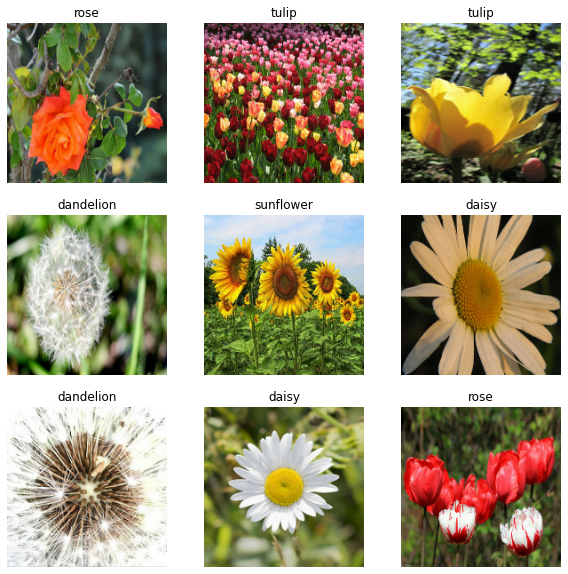

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
 for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i].numpy().astype("uint8"))
  plt.title(class_names[labels[i]])
  plt.axis("off")

Question-4. Add the layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [14]:
num_classes = len(class_names)
model = Sequential([data_augmentation,layers.Rescaling(1./225,input_shape=(img_height,img_width,3)),
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128,activation='relu'),
                    layers.Dense(num_classes)
                    ])

Question-5. Compile The Model

In [15]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy&quot"], optimizer = "adam")
len(x_train)

44

Question-6. Fit The Model

In [38]:
model.fit(x_train,epochs = 15,steps_per_epoch = len(x_train),validation,validation_steps=len(x_train))

SyntaxError: ignored

Save Model

In [21]:
model.save('flowers.h5')

Test Model

In [22]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('flowers.h5')

In [26]:
img=image.load_img('/content/flowers/tulip/10163955604_ae0b830975_n.jpg')

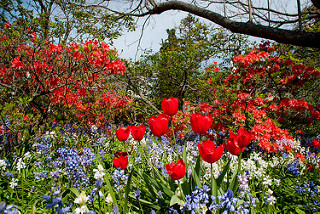

In [27]:
img

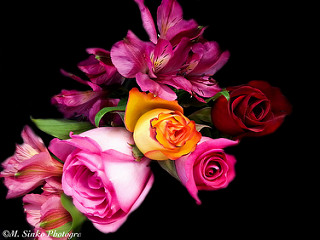

In [28]:
img=image.load_img('/content/flowers/rose/11233672494_d8bf0a3dbf_n.jpg')
img

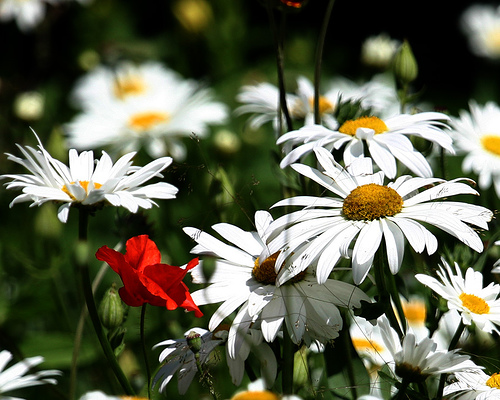

In [30]:
img=image.load_img('/content/flowers/daisy/102841525_bd6628ae3c.jpg')
img

In [31]:
x = image.img_to_array(img)
x.ndim

3

In [33]:
x=image.img_to_array(img)
x

array([[[140., 125.,  86.],
        [148., 135., 100.],
        [151., 145., 111.],
        ...,
        [  3.,   3.,   3.],
        [  3.,   3.,   3.],
        [  2.,   4.,   3.]],

       [[143., 129.,  94.],
        [150., 139., 107.],
        [156., 149., 120.],
        ...,
        [  3.,   5.,   4.],
        [  3.,   5.,   4.],
        [  4.,   6.,   5.]],

       [[145., 136., 105.],
        [153., 146., 117.],
        [162., 156., 130.],
        ...,
        [  5.,   9.,   8.],
        [  6.,  10.,   9.],
        [  7.,  11.,  10.]],

       ...,

       [[ 88.,  97.,  68.],
        [ 82.,  92.,  65.],
        [ 77.,  89.,  67.],
        ...,
        [242., 242., 244.],
        [233., 233., 235.],
        [254., 254., 255.]],

       [[ 92., 102.,  78.],
        [ 95., 104.,  83.],
        [ 97., 108.,  91.],
        ...,
        [253., 253., 253.],
        [246., 246., 246.],
        [228., 228., 228.]],

       [[108., 119., 102.],
        [114., 126., 112.],
        [119., 1

In [34]:
x=np.expand_dims(x,axis=0)
x

array([[[[140., 125.,  86.],
         [148., 135., 100.],
         [151., 145., 111.],
         ...,
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  2.,   4.,   3.]],

        [[143., 129.,  94.],
         [150., 139., 107.],
         [156., 149., 120.],
         ...,
         [  3.,   5.,   4.],
         [  3.,   5.,   4.],
         [  4.,   6.,   5.]],

        [[145., 136., 105.],
         [153., 146., 117.],
         [162., 156., 130.],
         ...,
         [  5.,   9.,   8.],
         [  6.,  10.,   9.],
         [  7.,  11.,  10.]],

        ...,

        [[ 88.,  97.,  68.],
         [ 82.,  92.,  65.],
         [ 77.,  89.,  67.],
         ...,
         [242., 242., 244.],
         [233., 233., 235.],
         [254., 254., 255.]],

        [[ 92., 102.,  78.],
         [ 95., 104.,  83.],
         [ 97., 108.,  91.],
         ...,
         [253., 253., 253.],
         [246., 246., 246.],
         [228., 228., 228.]],

        [[108., 119., 102.],
       

In [37]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}